Importing the necessary libararies

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
#importing data
pd.set_option('display.max_columns',None)
data_cust=pd.read_csv('client_data.csv')
data_price_sen=pd.read_csv('price_data.csv')

In [4]:
#more info about the customer data
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
#checking for null valued
data_cust.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [6]:
#More info about the price data
data_price_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
#checking for null values
data_price_sen.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [247]:
##descriptive stats for continuos variables
data_cust.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [248]:
#descriptive stats for categorical variable
data_cust.describe(include='object')

id                     channel_sales  \
count                              14606                             14606   
unique                             14606                                 8   
top     24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
freq                                   1                              6754   

        date_activ    date_end date_modif_prod date_renewal has_gas  \
count        14606       14606           14606        14606   14606   
unique        1796         368            2129          386       2   
top     2009-08-01  2016-02-01      2015-11-01   2015-06-23       f   
freq            95         145             721          587   11955   

                               origin_up  
count                              14606  
unique                                 6  
top     lxidpiddsbxsbosboudacockeimpuepw  
freq                                7097

In [249]:
#descriptive stats for continuos variables in price data
data_price_sen.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

In [251]:
#descriptive stats for categorical variable in price data
data_price_sen.describe(include='object')

id  price_date
count                             193002      193002
unique                             16096          12
top     038af19179925da21a25619c5a24b745  2015-08-01
freq                                  12       16094

In [252]:
#Conversion to datetime format from string in customer data
data_cust['date_activ'] = pd.to_datetime(data_cust['date_activ'])
data_cust['date_end'] = pd.to_datetime(data_cust['date_end'])
data_cust['date_modif_prod'] = pd.to_datetime(data_cust['date_modif_prod'])
data_cust['date_renewal'] = pd.to_datetime(data_cust['date_renewal'])

#Conversion to datetime format from string in customer data
data_price_sen['price_date'] = pd.to_datetime(data_price_sen['price_date'])

Pivoting the data from both the dataframes to see the effect of some factors

In [253]:
#pivoting data across the months of the given continuos variables in customer data
data_cust.pivot_table(columns='num_years_antig',values='churn', aggfunc=sum,dropna=True)

num_years_antig  1   2    3    4    5    6   7   8   9   10  11  12  13
churn             0   3  329  472  200  339  42   5   1   4  12  11   1

C:\Users\jubin\AppData\Local\Temp\ipykernel_12976\389523692.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cust.corr(),annot=True,annot_kws={"fontsize":5} )


<Axes: >

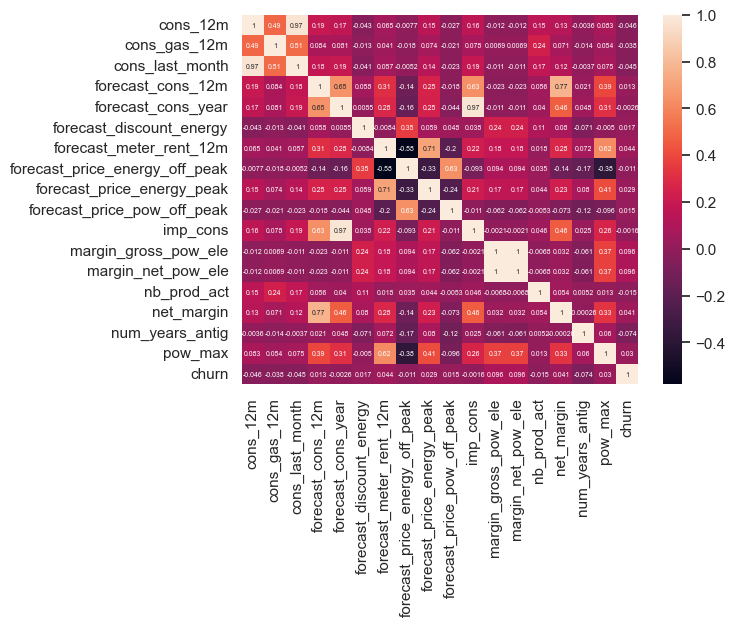

In [141]:
#correlation among different variables
sns.heatmap(data_cust.corr(),annot=True,annot_kws={"fontsize":5} )

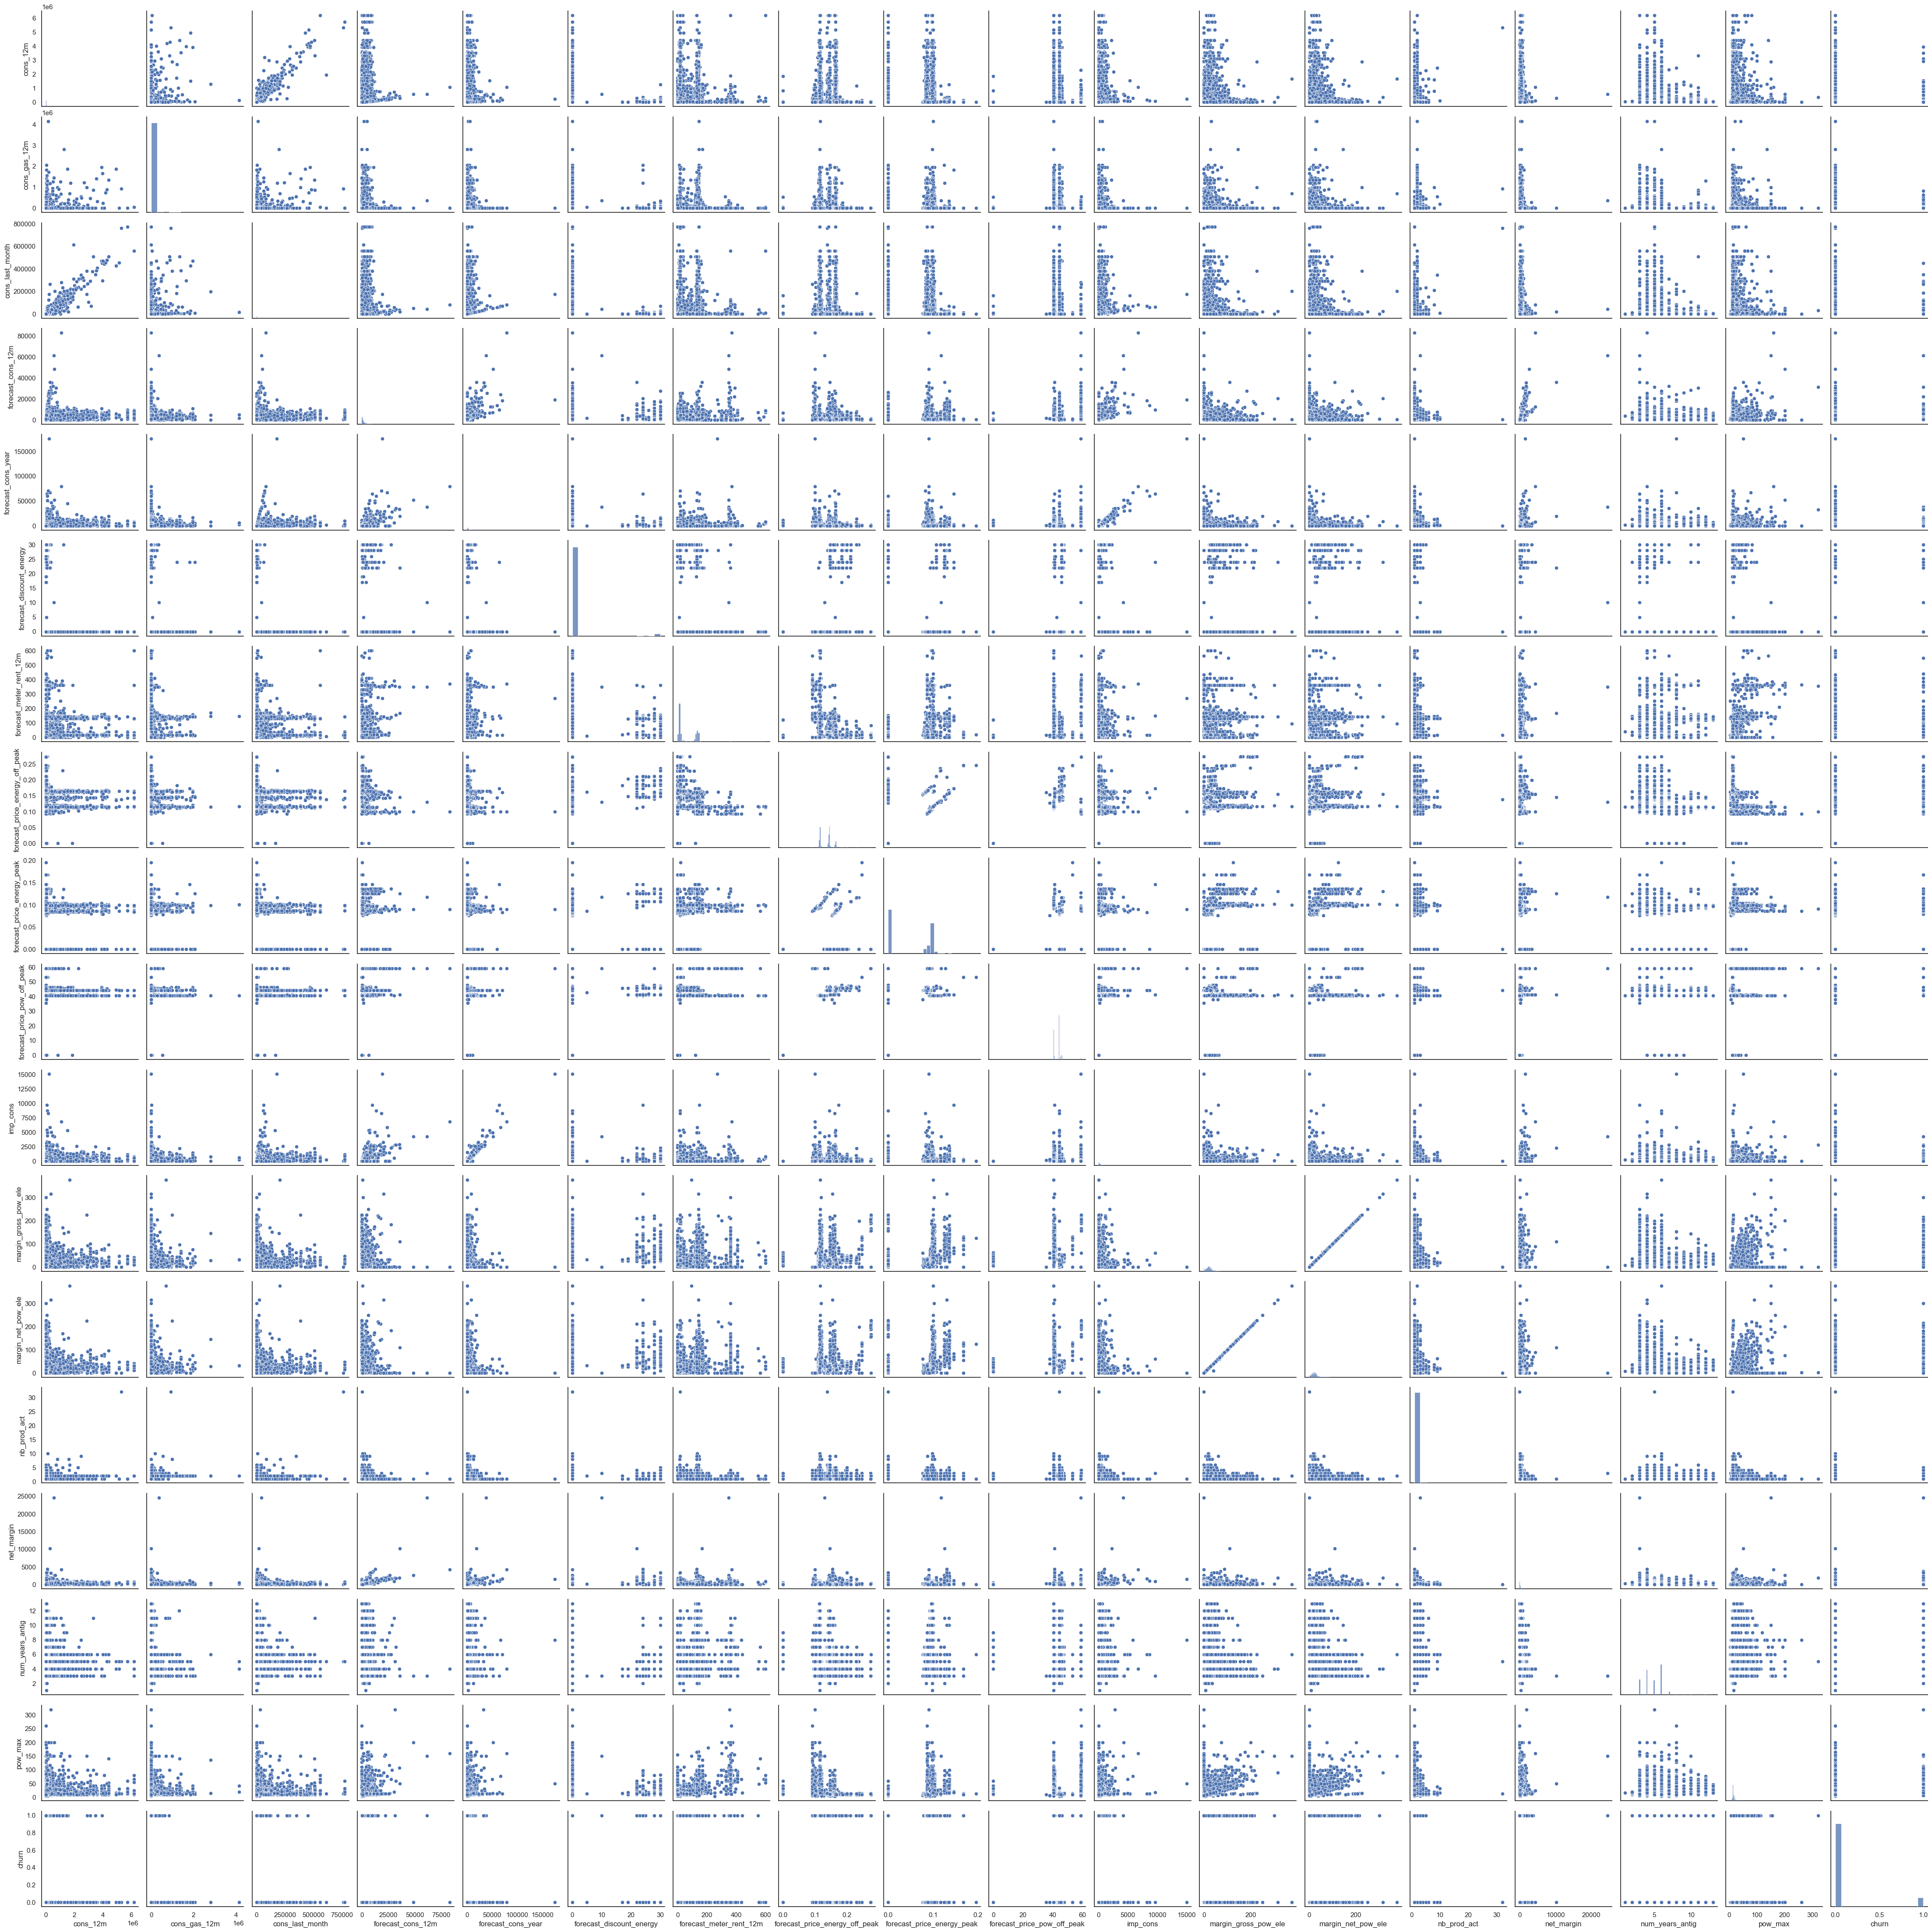

In [256]:
#pairplot
sns.pairplot(data_cust)

Text(0, 0.5, 'count_of_churned_customers')

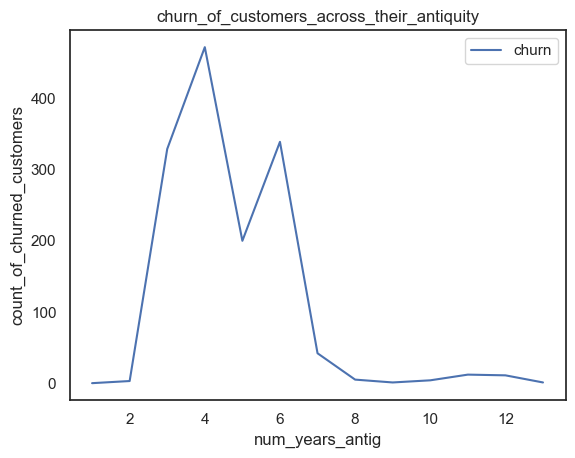

In [143]:
#trend of churn over the num_years_antig
pd.pivot_table(data=data_cust,index='num_years_antig',values='churn',aggfunc=np.sum).plot().set_title('churn_of_customers_across_their_antiquity')
plt.ylabel('count_of_churned_customers')

In [258]:
pd.pivot_table(data=data_cust,index='num_years_antig',values='churn',aggfunc=np.sum)

churn
num_years_antig       
1                    0
2                    3
3                  329
4                  472
5                  200
6                  339
7                   42
8                    5
9                    1
10                   4
11                  12
12                  11
13                   1

Sensitivity Analysis

In [122]:
#pivoting data across the months of the given continuos variables in price data
data_price_sen.pivot_table(columns='price_date',dropna=True)

C:\Users\jubin\AppData\Local\Temp\ipykernel_12976\3435345908.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_price_sen.pivot_table(columns='price_date',dropna=True)


price_date          2015-01-01  2015-02-01  2015-03-01  2015-04-01  \
price_mid_peak_fix    6.455861    6.449016    6.430121    6.423156   
price_mid_peak_var    0.030333    0.030367    0.030396    0.030492   
price_off_peak_fix   43.226643   43.238161   43.254033   43.288439   
price_off_peak_var    0.142568    0.142767    0.143104    0.143259   
price_peak_fix       10.692921   10.673719   10.644489   10.647277   
price_peak_var        0.054950    0.055053    0.055118    0.056035   

price_date          2015-05-01  2015-06-01  2015-07-01  2015-08-01  \
price_mid_peak_fix    6.390806    6.281304    6.421464    6.431518   
price_mid_peak_var    0.030393    0.029902    0.030636    0.030717   
price_off_peak_fix   43.315388   43.347320   43.345012   43.365366   
price_off_peak_var    0.143534    0.143731    0.143683    0.137933   
price_peak_fix       10.602453   10.415769   10.642236   10.661678   
price_peak_var        0.055359    0.055255    0.055369    0.053605   

price_date          2015-09-01  2015-10-01  2015-11-01  2015-12-01  
price_mid_peak_fix    6.391788    6.396084    6.421622    6.427104  
price_mid_peak_var    0.030606    0.030641    0.030737    0.030732  
price_off_peak_fix   43.351874   43.354226   43.422764   43.504177  
price_off_peak_var    0.137933    0.137899    0.137909    0.138011  
price_peak_fix       10.602979   10.605431   10.641489   10.644109  
price_peak_var        0.053532    0.053713    0.053620    0.053957

C:\Users\jubin\AppData\Local\Temp\ipykernel_12976\2897765694.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=sns.lineplot(data=data_price_sen.groupby('price_date').mean())


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01')])

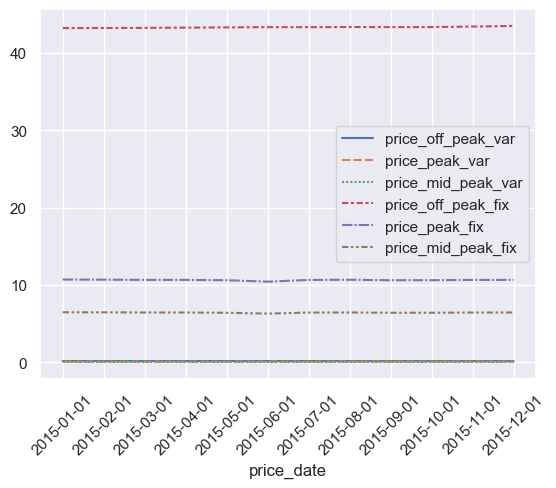

In [121]:
#checking for seasonality in the avg monthly prices
a=sns.lineplot(data=data_price_sen.groupby('price_date').mean())
plt.xticks(rotation=45)

In [115]:
#getting the churn column in the cust price data
data_price_sen_com = pd.merge(data_price_sen, data_cust[['id', 'churn','pow_max']], on='id')

C:\Users\jubin\AppData\Local\Temp\ipykernel_12976\2891482439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_price_sen_com.corr(),annot=True)


<Axes: >

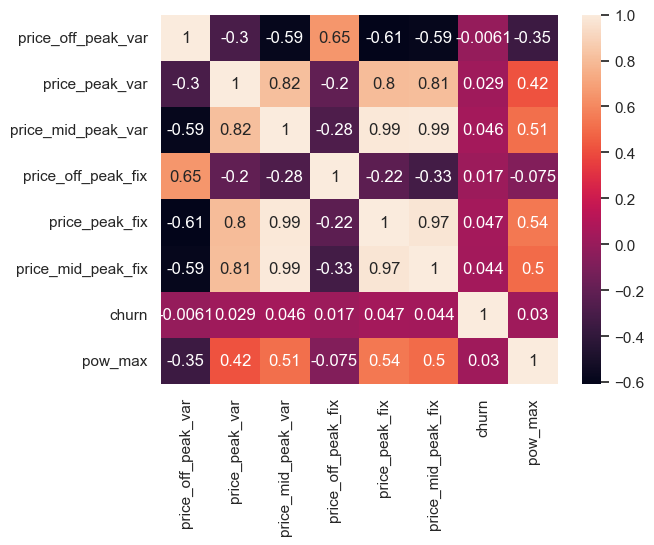

In [116]:
sns.heatmap(data_price_sen_com.corr(),annot=True)

In [117]:
#creation of new variables in order to check better for sensitivity
data_price_sen_com['total_price_off_peak'] = data_price_sen_com['price_off_peak_var'] + data_price_sen_com['price_off_peak_fix']
data_price_sen_com['total_price_peak'] = data_price_sen_com['price_peak_var'] + data_price_sen_com['price_peak_fix']
data_price_sen_com['avg_fixed_cost'] = ((data_price_sen_com['price_off_peak_fix'] + data_price_sen_com['price_peak_fix'] + data_price_sen_com['price_mid_peak_fix'])/3)
data_price_sen_com['avg_var_cost'] = ((data_price_sen_com['price_off_peak_var'] + data_price_sen_com['price_peak_var'] + data_price_sen_com['price_mid_peak_var'])/3)

C:\Users\jubin\AppData\Local\Temp\ipykernel_12976\4271974034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_price_sen_com.corr(),annot=True,annot_kws={"fontsize":8})


<Axes: >

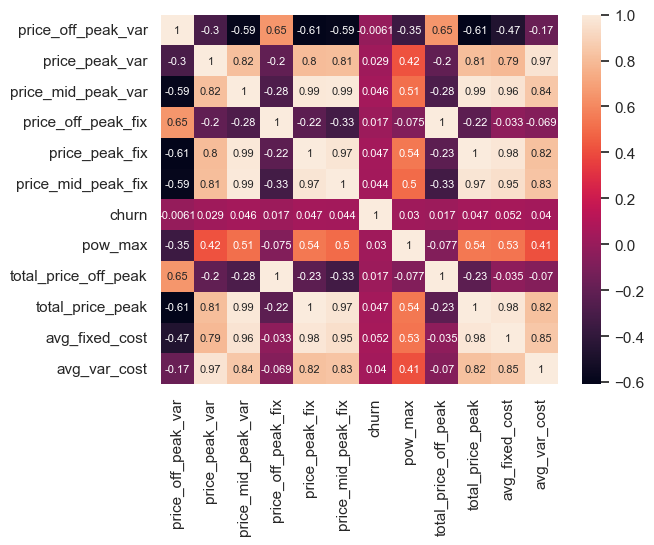

In [120]:
#checking for possible correlations, among the churn indicator and price sensitivity
sns.heatmap(data_price_sen_com.corr(),annot=True,annot_kws={"fontsize":8})
#as we can see the correlation values are very low across all price variables, which is an indication of the impact price has on the churn rate 

EDA on all the variables and their effect on churn

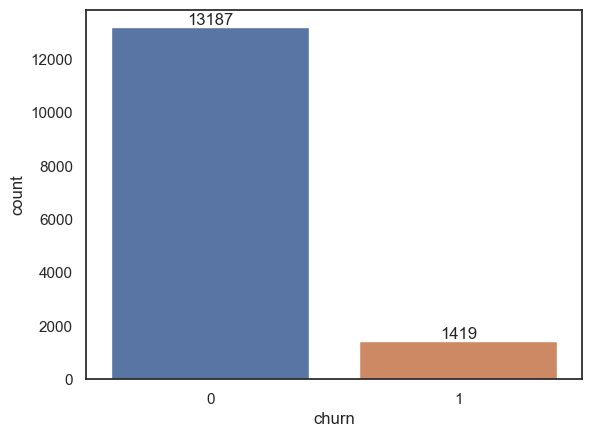

In [126]:
#Checking the number of people who have churned and no churned 
ax=sns.countplot(x=data_cust['churn'])
for c in ax.containers:
    ax.bar_label(c,)

In [139]:
x=data_cust['churn'].value_counts()[1]/(data_cust['churn'].value_counts()[1]+data_cust['churn'].value_counts()[0])
churn_rate_=(x*100)
print(f'{churn_rate_}%')

9.715185540188962%


In [14]:
def plotter(LIST):
#for plotting
        for x in LIST: 
            #creating a new series with relevant values
            churned_tot_count=data_cust.groupby(x)['churn'].count()
            churned_count=data_cust.groupby(x,dropna=False)[['churn']].sum()
            #conversion of series to DataFrame
            churned_tot_count=churned_tot_count.to_frame()
            #Creatipn of new data frame with values for plotting
            bar_chart=pd.DataFrame()
            bar_chart['Retained_Number']=churned_tot_count['churn']-churned_count['churn']
            bar_chart['Churn_rate']=churned_count['churn']/churned_tot_count['churn']*100
            bar_chart['Retention_rate']=bar_chart['Retained_Number']/churned_tot_count['churn']*100
            bar_chart['Retention_rate']
            
            #Dropping retained numbers as a column for the plotting
            bar_chart=bar_chart.drop(columns='Retained_Number')
            
            #bar_chart
            sns.set(style='white')
            ax=bar_chart.plot(kind='bar', stacked=True, color=['red', 'green'])
            # Adding bar labels
            for c in ax.containers:
                labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
                ax.bar_label(c,
                             label_type='center',
                             labels = labels,
                             size = 7) 

            # Add Title and Labels
            title='Churn Rate and Retention Rate across'+' '+x+'(%)'
            plt.title(title)
            plt.xlabel(x)
            plt.ylabel('Churn Rate and Retention Rate')

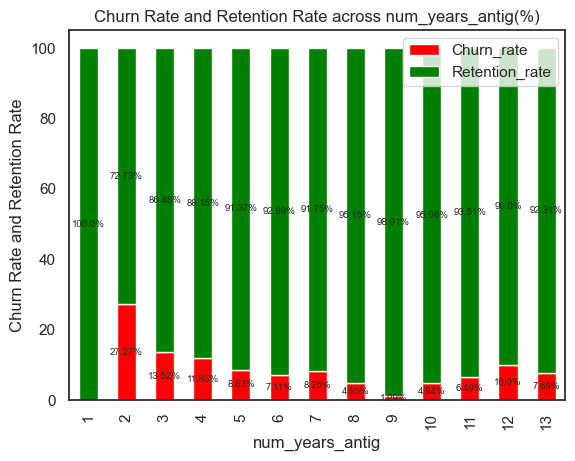

In [15]:
#Distribution of retention and churn rates across antiquity of the client (in number of years)
plotter(['num_years_antig'])

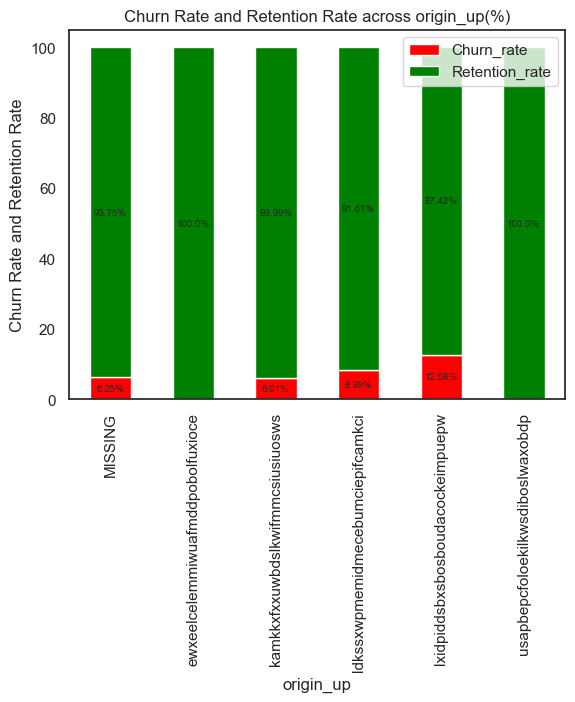

In [16]:
#Distribution of retention and churn rates across the electricity campaign the customer first subscribed to
plotter(['origin_up'])

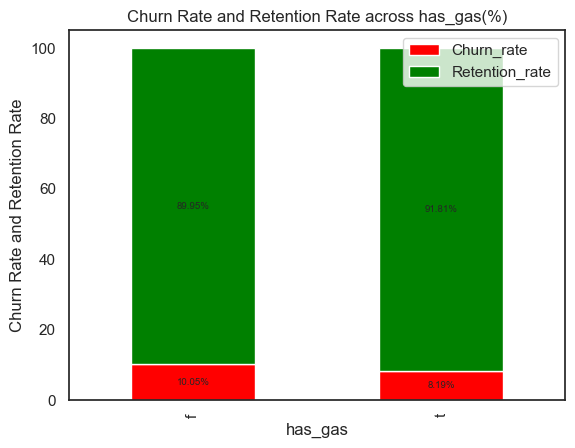

In [17]:
#Distribution of retention and churn rates across whether client also has gas or not
plotter(['has_gas'])

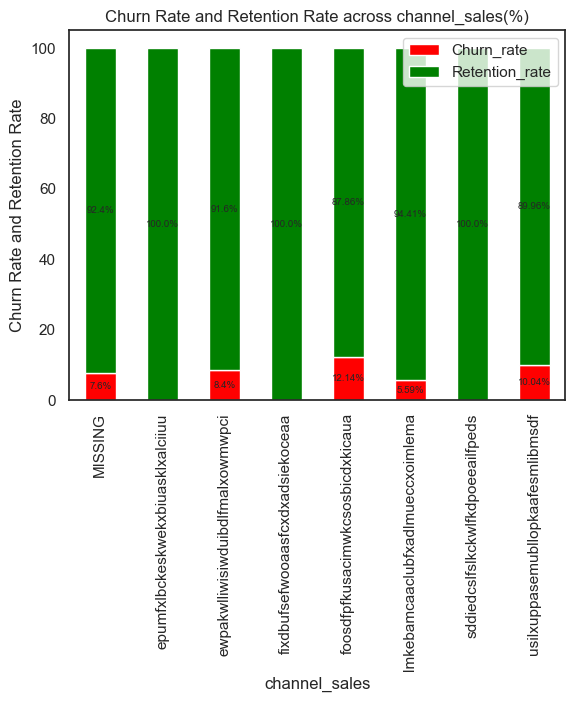

In [18]:
#Distribution of retention and churn rates across the sales channels
plotter(['channel_sales'])

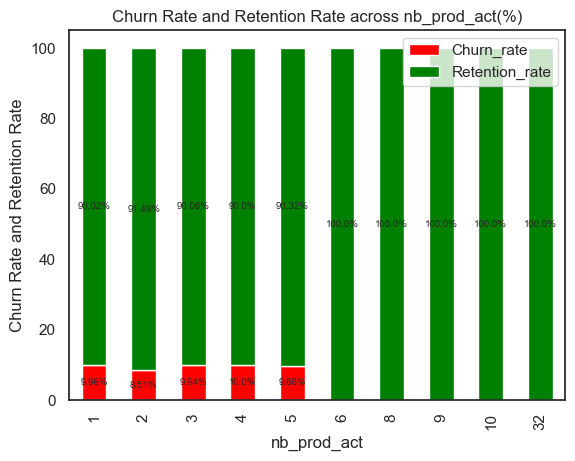

In [19]:
#Distribution of retention and churn rates across the number of active products and services
plotter(['nb_prod_act'])

In [224]:
#creating a binning function for the continuos variables
#creating a new dataframe for the binned data
binned_data=pd.DataFrame()
binned_data['id']=data_cust['id']
binned_data['churn']=data_cust['churn']
#creating a definition for binning
def Binner(x,y):
        nam=x.name
        mi=x.min()
        z=x.max()
        w=z/y
        bins=[]
        labels=[]
        for n in range(y):
            step=mi+n*w
            stop=z
            bins.append(int(step))
            labels.append(n)
        bins.append(int(stop))
        name=nam+'_'+'Binned'
        binned_data[name] = pd.cut(x = x, bins = bins, labels = labels, include_lowest = True)

In [238]:
Binner(data_cust['cons_12m'],4)
Binner(data_cust['cons_gas_12m'],4)
Binner(data_cust['cons_last_month'],4)
Binner(data_cust['forecast_cons_12m'],4)
Binner(data_cust['forecast_cons_year'],4)
Binner(data_cust['forecast_discount_energy'],4)
Binner(data_cust['forecast_meter_rent_12m'],4)
#Binner(data_cust['forecast_price_energy_off_peak'],5)
#Binner(data_cust['forecast_price_energy_peak'],5)
Binner(data_cust['forecast_price_pow_off_peak'],4)
Binner(data_cust['imp_cons'],4)
Binner(data_cust['margin_gross_pow_ele'],4)
Binner(data_cust['margin_net_pow_ele'],4)
Binner(data_cust['pow_max'],4)

In [198]:
def plotter_num(LIST):
        #for plotting
        for x in LIST: 
            #creating a new series with relevant values
            churned_tot_count=binned_data.groupby(x)['churn'].count()
            churned_count=binned_data.groupby(x,dropna=False)[['churn']].sum()
            #conversion of series to DataFrame
            churned_tot_count=churned_tot_count.to_frame()
            #Creatipn of new data frame with values for plotting
            bar_chart=pd.DataFrame()
            bar_chart['Retained_Number']=churned_tot_count['churn']-churned_count['churn']
            bar_chart['Churn_rate']=churned_count['churn']/churned_tot_count['churn']*100
            bar_chart['Retention_rate']=bar_chart['Retained_Number']/churned_tot_count['churn']*100
            bar_chart['Retention_rate']
            
            #Dropping retained numbers as a column for the plotting
            bar_chart=bar_chart.drop(columns='Retained_Number')
            
            #bar_chart
            sns.set(style='white')
            ax=bar_chart.plot(kind='bar', stacked=True, color=['red', 'green'])
            # Adding bar labels
            for c in ax.containers:
                labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
                ax.bar_label(c,
                             label_type='center',
                             labels = labels,
                             size = 7) 

            # Add Title and Labels
            title='Churn Rate and Retention Rate across'+' '+x+'(%)'
            plt.title(title)
            plt.xlabel(x)
            plt.ylabel('Churn Rate and Retention Rate')

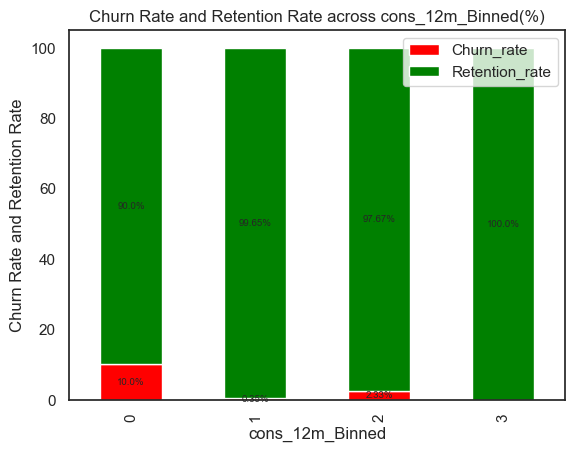

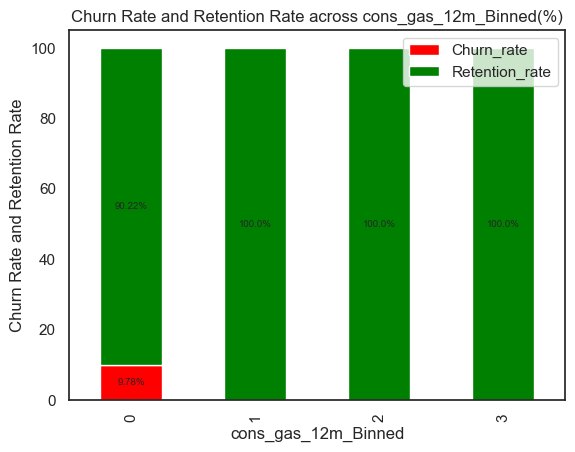

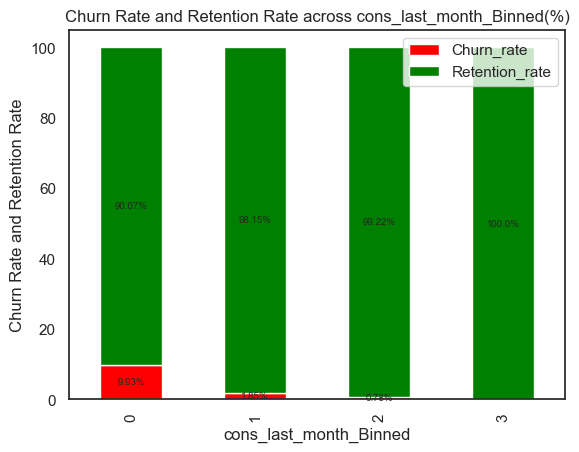

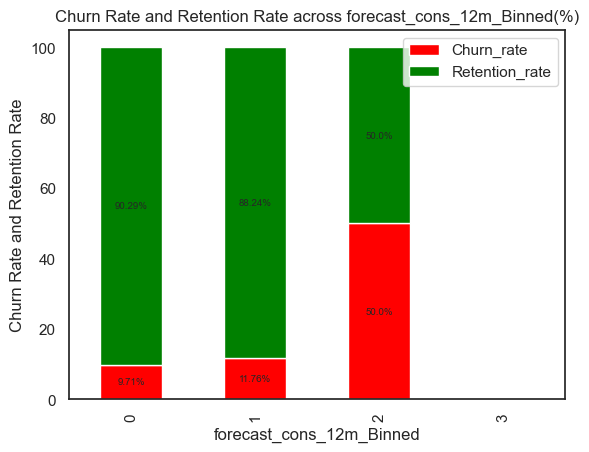

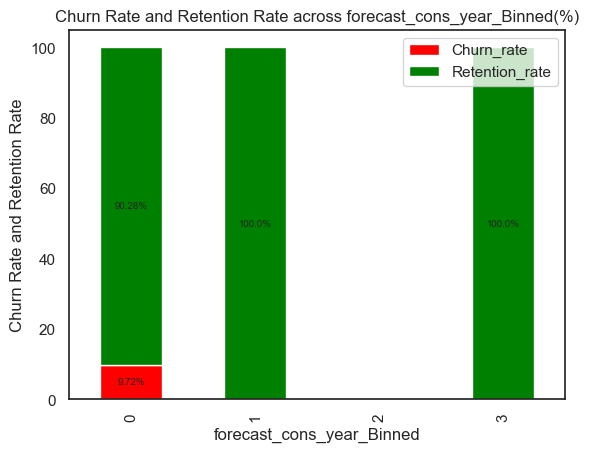

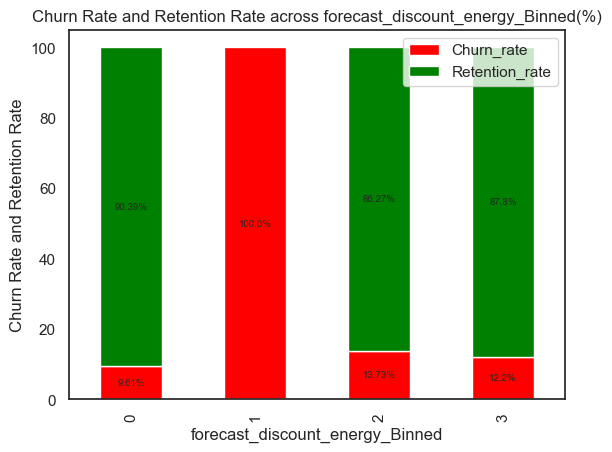

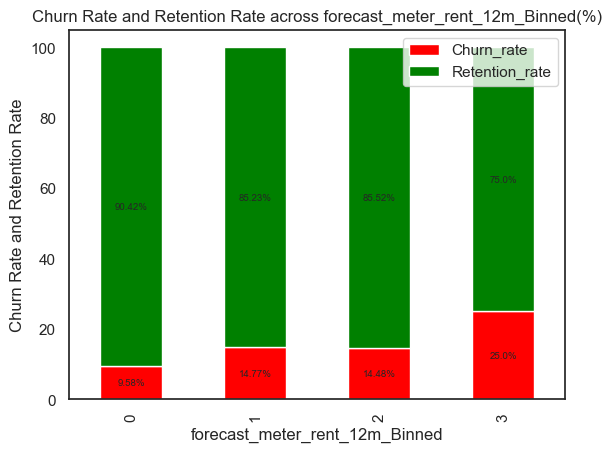

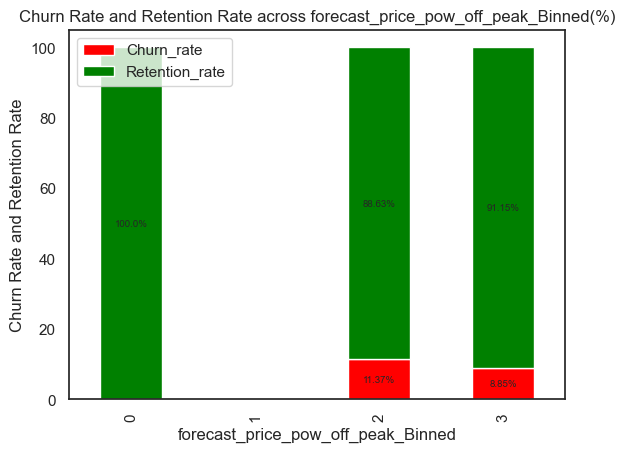

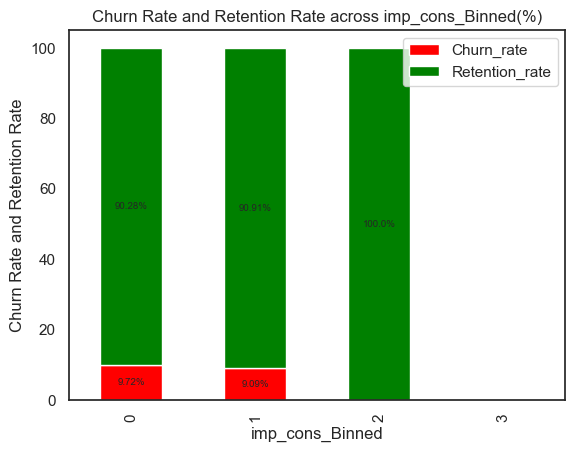

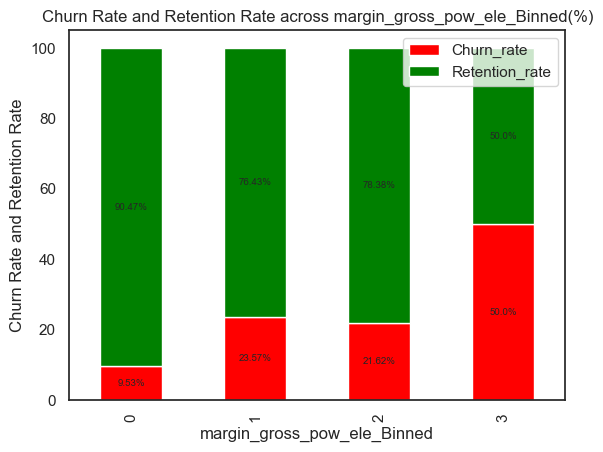

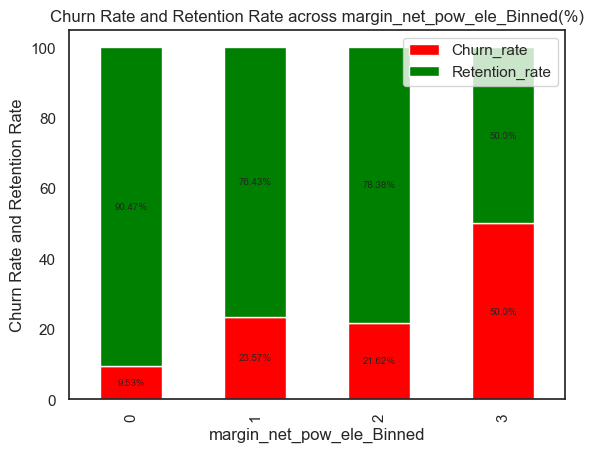

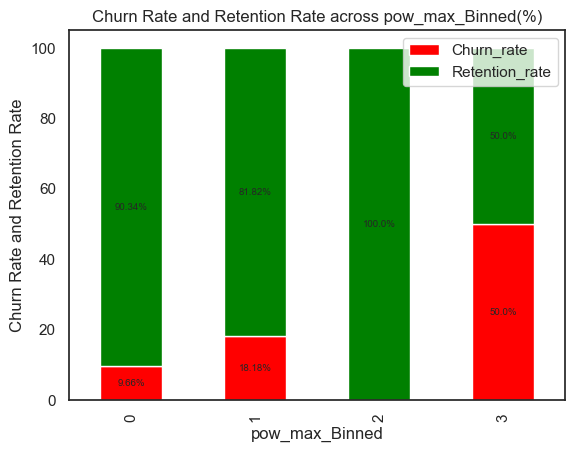

In [240]:
#plotting the continuos variables after binng them to observe the trend of churn and retention rate
plotter_num(['cons_12m_Binned', 'cons_gas_12m_Binned',
       'cons_last_month_Binned', 'forecast_cons_12m_Binned',
       'forecast_cons_year_Binned', 'forecast_discount_energy_Binned',
       'forecast_meter_rent_12m_Binned', 'forecast_price_pow_off_peak_Binned',
       'imp_cons_Binned', 'margin_gross_pow_ele_Binned',
       'margin_net_pow_ele_Binned', 'pow_max_Binned'])